In [4]:
import pandas as pd
import numpy as np
import platform
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
import pandas as pd
import numpy as np

import platform
import matplotlib.pyplot as plt

%matplotlib inline

from matplotlib import font_manager, rc

# matplotlib를 통해 차트를 생성할 때 한글이 제대로 표시되지 않기 떄문에 OS에 따라 font 변경
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:
    print('Unknown system… sorry~~~~')    

plt.rcParams['axes.unicode_minus'] = False

In [8]:
path = 'C:/Users/dazzul/Documents/GitHub/python_basic/20190929/data/05. population_raw_data.xlsx'
data = pd.read_excel(path, header = 1)
data.head()

,행정구역(동읍면)별(1),행정구역(동읍면)별(2),항목,계,20 - 24세,25 - 29세,30 - 34세,35 - 39세,65 - 69세,70 - 74세,75 - 79세,80 - 84세,85 - 89세,90 - 94세,95 - 99세,100+
0,전국,소계,총인구수 (명),51696216.0,3541061.0,3217367.0,3517868,4016272.0,2237345.0,1781229.0,1457890,909130.0,416164.0,141488.0,34844,17562.0
1,NaN,NaN,남자인구수 (명),25827594.0,1877127.0,1682988.0,1806754,2045265.0,1072395.0,806680.0,600607,319391.0,113221.0,32695.0,7658,4137.0
2,NaN,NaN,여자인구수 (명),25868622.0,1663934.0,1534379.0,1711114,1971007.0,1164950.0,974549.0,857283,589739.0,302943.0,108793.0,27186,13425.0
3,서울특별시,소계,총인구수 (명),9930616.0,690728.0,751973.0,803507,817467.0,448956.0,350580.0,251961,141649.0,66067.0,24153.0,7058,5475.0
4,NaN,NaN,남자인구수 (명),4876789.0,347534.0,372249.0,402358,410076.0,211568.0,163766.0,112076,54033.0,19595.0,6146.0,1900,1406.0


In [17]:
data.fillna(method='pad', inplace=True)
data.rename(columns={'행정구역(동읍면)별(1)':'광역시도',
                    '행정구역(동읍면)별(2)':'시도',
                    '계':'인구수'}, inplace=True)
data=data[data['시도']!='소계']
data.head(3)

,광역시도,시도,구분,인구수,20 - 24세,25 - 29세,30 - 34세,35 - 39세,65 - 69세,70 - 74세,75 - 79세,80 - 84세,85 - 89세,90 - 94세,95 - 99세,100+,20 - 39세,65세 이상
6,서울특별시,종로구,합계,152737.0,11379.0,11891.0,10684,10379.0,7411.0,6636.0,5263,3104.0,1480.0,602.0,234,220.0,44333.0,24950.0
7,서울특별시,종로구,남자,75201.0,5620.0,6181.0,5387,5034.0,3411.0,3009.0,2311,1289.0,506.0,207.0,89,73.0,22222.0,10895.0
8,서울특별시,종로구,여자,77536.0,5759.0,5710.0,5297,5345.0,4000.0,3627.0,2952,1815.0,974.0,395.0,145,147.0,22111.0,14055.0


In [18]:
len(data)

792

In [19]:
data.is_copy = False
data.rename(columns={'항목':'구분'}, inplace=True)
data.loc[data['구분'] == '총인구수 (명)', '구분'] = '합계'
data.loc[data['구분'] == '남자인구수 (명)', '구분'] = '남자'
data.loc[data['구분'] == '여자인구수 (명)', '구분'] = '여자'
data.head(3)

,광역시도,시도,구분,인구수,20 - 24세,25 - 29세,30 - 34세,35 - 39세,65 - 69세,70 - 74세,75 - 79세,80 - 84세,85 - 89세,90 - 94세,95 - 99세,100+,20 - 39세,65세 이상
6,서울특별시,종로구,합계,152737.0,11379.0,11891.0,10684,10379.0,7411.0,6636.0,5263,3104.0,1480.0,602.0,234,220.0,44333.0,24950.0
7,서울특별시,종로구,남자,75201.0,5620.0,6181.0,5387,5034.0,3411.0,3009.0,2311,1289.0,506.0,207.0,89,73.0,22222.0,10895.0
8,서울특별시,종로구,여자,77536.0,5759.0,5710.0,5297,5345.0,4000.0,3627.0,2952,1815.0,974.0,395.0,145,147.0,22111.0,14055.0


### 인구소멸위기란? 
### 65세 이상 노인인구와 20~39세 여성인구를 비교하여 여성인구가 노인인구의 절반에 미달할 경우를 의미함
# 20 ~30 대와 65세 인구수 출력

In [38]:
data['20-39세'] = data['20 - 24세'] + data['25 - 29세'] + data['30 - 34세'] + data['35 - 39세']
data['65세이상'] = data['65 - 69세'] + data['70 - 74세'] + data['75 - 79세'] + data['80 - 84세'] + data['85 - 89세'] + data['90 - 94세'] + data['95 - 99세'] + data['100+']
data.head()

,광역시도,시도,구분,인구수,20 - 24세,25 - 29세,30 - 34세,35 - 39세,65 - 69세,70 - 74세,75 - 79세,80 - 84세,85 - 89세,90 - 94세,95 - 99세,100+,20 - 39세,65세 이상,20-39세,65세이상
6,서울특별시,종로구,합계,152737.0,11379.0,11891.0,10684,10379.0,7411.0,6636.0,5263,3104.0,1480.0,602.0,234,220.0,44333.0,24950.0,44333.0,24950.0
7,서울특별시,종로구,남자,75201.0,5620.0,6181.0,5387,5034.0,3411.0,3009.0,2311,1289.0,506.0,207.0,89,73.0,22222.0,10895.0,22222.0,10895.0
8,서울특별시,종로구,여자,77536.0,5759.0,5710.0,5297,5345.0,4000.0,3627.0,2952,1815.0,974.0,395.0,145,147.0,22111.0,14055.0,22111.0,14055.0
9,서울특별시,중구,합계,125249.0,8216.0,9529.0,10332,10107.0,6399.0,5313.0,4127,2502.0,1260.0,469.0,158,160.0,38184.0,20388.0,38184.0,20388.0
10,서울특별시,중구,남자,62204.0,4142.0,4792.0,5192,5221.0,3113.0,2405.0,1752,929.0,414.0,132.0,56,51.0,19347.0,8852.0,19347.0,8852.0


In [39]:
pop = pd.pivot_table(data, index=['광역시도', '시도'], columns=['구분'], values=['인구수', '20-39세', '65세이상'])
pop.head()

20-39세                      65세이상                         인구수  \
구분             남자       여자       합계       남자       여자       합계        남자   
광역시도 시도                                                                    
강원도  강릉시  26286.0  23098.0  49384.0  15767.0  21912.0  37679.0  106231.0   
     고성군   4494.0   2529.0   7023.0   2900.0   4251.0   7151.0   15899.0   
     동해시  11511.0   9753.0  21264.0   6392.0   8732.0  15124.0   47166.0   
     삼척시   8708.0   7115.0  15823.0   5892.0   8718.0  14610.0   35253.0   
     속초시   9956.0   8752.0  18708.0   5139.0   7613.0  12752.0   40288.0   

                              
구분              여자        합계  
광역시도 시도                       
강원도  강릉시  107615.0  213846.0  
     고성군   14215.0   30114.0  
     동해시   46131.0   93297.0  
     삼척시   34346.0   69599.0  
     속초시   41505.0   81793.0

In [40]:
pop['소멸비율'] = pop['20-39세', '여자'] / (pop['65세이상', '합계']/2)
pop['소멸위기지역'] = pop['소멸비율'] <1.0
# pop['소멸비율'] < 1.0 하면, 값이 True/False로 나오게 된다.

In [41]:
pop[pop['소멸위기지역']==True].index.get_level_values(1)

Index(['고성군', '삼척시', '양양군', '영월군', '정선군', '평창군', '홍천군', '횡성군', '가평군', '양평군',
       '연천군', '거창군', '고성군', '남해군', '밀양시', '산청군', '의령군', '창녕군', '하동군', '함안군',
       '함양군', '합천군', '고령군', '군위군', '문경시', '봉화군', '상주시', '성주군', '영덕군', '영양군',
       '영주시', '영천시', '예천군', '울릉군', '울진군', '의성군', '청도군', '청송군', '동구', '영도구',
       '강화군', '옹진군', '강진군', '고흥군', '곡성군', '구례군', '담양군', '보성군', '신안군', '영광군',
       '영암군', '완도군', '장성군', '장흥군', '진도군', '함평군', '해남군', '화순군', '고창군', '김제시',
       '남원시', '무주군', '부안군', '순창군', '임실군', '장수군', '정읍시', '진안군', '공주시', '금산군',
       '논산시', '보령시', '부여군', '서천군', '예산군', '청양군', '태안군', '홍성군', '괴산군', '단양군',
       '보은군', '영동군', '옥천군'],
      dtype='object', name='시도')

In [42]:
pop.reset_index(inplace=True)
pop.head(3)

광역시도   시도   20-39세                      65세이상                         인구수  \
구분                 남자       여자       합계       남자       여자       합계        남자   
0   강원도  강릉시  26286.0  23098.0  49384.0  15767.0  21912.0  37679.0  106231.0   
1   강원도  고성군   4494.0   2529.0   7023.0   2900.0   4251.0   7151.0   15899.0   
2   강원도  동해시  11511.0   9753.0  21264.0   6392.0   8732.0  15124.0   47166.0   

                            소멸비율 소멸위기지역  
구분        여자        합계                   
0   107615.0  213846.0  1.226041  False  
1    14215.0   30114.0  0.707314   True  
2    46131.0   93297.0  1.289738  False

In [43]:
pop.columns = [pop.columns.get_level_values(0)[n] + pop.columns.get_level_values(1)[n] for n in range(0, len(pop.columns.get_level_values(0)))]
pop.head(3)

,광역시도,시도,20-39세남자,20-39세여자,20-39세합계,65세이상남자,65세이상여자,65세이상합계,인구수남자,인구수여자,인구수합계,소멸비율,소멸위기지역
0,강원도,강릉시,26286.0,23098.0,49384.0,15767.0,21912.0,37679.0,106231.0,107615.0,213846.0,1.226041,False
1,강원도,고성군,4494.0,2529.0,7023.0,2900.0,4251.0,7151.0,15899.0,14215.0,30114.0,0.707314,True
2,강원도,동해시,11511.0,9753.0,21264.0,6392.0,8732.0,15124.0,47166.0,46131.0,93297.0,1.289738,False


In [44]:
pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 13 columns):
광역시도        264 non-null object
시도          264 non-null object
20-39세남자    264 non-null float64
20-39세여자    264 non-null float64
20-39세합계    264 non-null float64
65세이상남자     264 non-null float64
65세이상여자     264 non-null float64
65세이상합계     264 non-null float64
인구수남자       264 non-null float64
인구수여자       264 non-null float64
인구수합계       264 non-null float64
소멸비율        264 non-null float64
소멸위기지역      264 non-null bool
dtypes: bool(1), float64(10), object(2)
memory usage: 25.1+ KB


In [45]:
pop['시도'].unique()

array(['강릉시', '고성군', '동해시', '삼척시', '속초시', '양구군', '양양군', '영월군', '원주시',
       '인제군', '정선군', '철원군', '춘천시', '태백시', '평창군', '홍천군', '화천군', '횡성군',
       '가평군', '고양시', '과천시', '광명시', '광주시', '구리시', '군포시', '권선구', '기흥구',
       '김포시', '남양주시', '단원구', '덕양구', '동두천시', '동안구', '만안구', '부천시', '분당구',
       '상록구', '성남시', '소사구', '수원시', '수정구', '수지구', '시흥시', '안산시', '안성시',
       '안양시', '양주시', '양평군', '여주시', '연천군', '영통구', '오산시', '오정구', '용인시',
       '원미구', '의왕시', '의정부시', '이천시', '일산동구', '일산서구', '장안구', '중원구', '처인구',
       '파주시', '팔달구', '평택시', '포천시', '하남시', '화성시', '거제시', '거창군', '김해시',
       '남해군', '마산합포구', '마산회원구', '밀양시', '사천시', '산청군', '성산구', '양산시', '의령군',
       '의창구', '진주시', '진해구', '창녕군', '창원시', '통영시', '하동군', '함안군', '함양군',
       '합천군', '경산시', '경주시', '고령군', '구미시', '군위군', '김천시', '남구', '문경시',
       '봉화군', '북구', '상주시', '성주군', '안동시', '영덕군', '영양군', '영주시', '영천시',
       '예천군', '울릉군', '울진군', '의성군', '청도군', '청송군', '칠곡군', '포항시', '광산구',
       '동구', '서구', '달서구', '달성군', '수성구', '중구', '대덕구', '유성구', '강서구', '금정구',
       '기

In [46]:
si = [None]*len(pop)
tmp_gu_dict = {'수원':['장안구', '권선구', '팔달구', '영통구'],
              '성남':['수정구', '중원구', '분당구'],
              '안양':['만안구', '동안구'],
              '안산':['상록구', '단원구'],
              '고양':['덕양구', '일산동구', '일산서구'],
              '용인':['처인구', '기흥구', '수지구'],
              '청주':['상당구', '서원구', '흥덕구', '청원구'],
              '천안':['동남구', '서북구'],
              '전주':['완산구', '덕진구'],
              '포항':['남구', '북구'],
              '창원':['의창구', '성산구', '진해구', '마산합포구', '마산회원구'],
              '부천':['오정구', '원미구', '소사구']}

In [47]:
for n in pop.index:
    # [-3:] 끝 3글자
    if pop['광역시도'][n][-3:] not in ['광역시', '특별시', '자치시']:
        # [:-1] 끝 1글자 빼고 나머지
        if pop['시도'][n][:-1] =='고성' and pop['광역시도'][n] =='강원도':
            si[n] = '고성(강원)'
        elif pop['시도'][n][:-1]=='고성' and pop['광역시도'][n] =='경상남도':
            si[n] = '고성(경남)'
        else:
            try:
                si[n] = pop['시도'][n][:-1]
            except:
                pass
            
        for keys, values in tmp_gu_dict.items():
            if pop['시도'][n] in values:
                if len(pop['시도'][n])==2:
                    si[n] = keys + ' '+pop['시도'][n]
                    
                elif pop['시도'][n] in ['마산합포구', '마산회원구']:
                    si[n] = keys + ' '+pop['시도'][n][2:-1]
                else:
                    si[n]  = keys + ' '+pop['시도'][n][:-1]
                    
    elif pop['광역시도'][n] == '세종특별자치시':
        si[n]= '세종'
    else:
        if len(pop['시도'][n]) == 2:
            si[n] = pop['광역시도'][n][:2]+ ' '+pop['시도'][n]
        else:
            # '시도'가 3글자 이상이면 보통 뒤에 구, 군, 시 등이 붙으므로 2글자로 맞춰줌
            si[n] = pop['광역시도'][n][:2]+ ' '+ pop['시도'][n][:-1]
si

['강릉',
 '고성(강원)',
 '동해',
 '삼척',
 '속초',
 '양구',
 '양양',
 '영월',
 '원주',
 '인제',
 '정선',
 '철원',
 '춘천',
 '태백',
 '평창',
 '홍천',
 '화천',
 '횡성',
 '가평',
 '고양',
 '과천',
 '광명',
 '광주',
 '구리',
 '군포',
 '수원 권선',
 '용인 기흥',
 '김포',
 '남양주',
 '안산 단원',
 '고양 덕양',
 '동두천',
 '안양 동안',
 '안양 만안',
 '부천',
 '성남 분당',
 '안산 상록',
 '성남',
 '부천 소사',
 '수원',
 '성남 수정',
 '용인 수지',
 '시흥',
 '안산',
 '안성',
 '안양',
 '양주',
 '양평',
 '여주',
 '연천',
 '수원 영통',
 '오산',
 '부천 오정',
 '용인',
 '부천 원미',
 '의왕',
 '의정부',
 '이천',
 '고양 일산동',
 '고양 일산서',
 '수원 장안',
 '성남 중원',
 '용인 처인',
 '파주',
 '수원 팔달',
 '평택',
 '포천',
 '하남',
 '화성',
 '거제',
 '거창',
 '고성(경남)',
 '김해',
 '남해',
 '창원 합포',
 '창원 회원',
 '밀양',
 '사천',
 '산청',
 '창원 성산',
 '양산',
 '의령',
 '창원 의창',
 '진주',
 '창원 진해',
 '창녕',
 '창원',
 '통영',
 '하동',
 '함안',
 '함양',
 '합천',
 '경산',
 '경주',
 '고령',
 '구미',
 '군위',
 '김천',
 '포항 남구',
 '문경',
 '봉화',
 '포항 북구',
 '상주',
 '성주',
 '안동',
 '영덕',
 '영양',
 '영주',
 '영천',
 '예천',
 '울릉',
 '울진',
 '의성',
 '청도',
 '청송',
 '칠곡',
 '포항',
 '광주 광산',
 '광주 남구',
 '광주 동구',
 '광주 북구',
 '광주 서구',
 '대구 남구',
 '대구 달서',
 '대구 달성',
 '대구 동구

In [48]:
pop['ID'] = si
pop.head(3)

,광역시도,시도,20-39세남자,20-39세여자,20-39세합계,65세이상남자,65세이상여자,65세이상합계,인구수남자,인구수여자,인구수합계,소멸비율,소멸위기지역,ID
0,강원도,강릉시,26286.0,23098.0,49384.0,15767.0,21912.0,37679.0,106231.0,107615.0,213846.0,1.226041,False,강릉
1,강원도,고성군,4494.0,2529.0,7023.0,2900.0,4251.0,7151.0,15899.0,14215.0,30114.0,0.707314,True,고성(강원)
2,강원도,동해시,11511.0,9753.0,21264.0,6392.0,8732.0,15124.0,47166.0,46131.0,93297.0,1.289738,False,동해


In [50]:
del pop['20-39세남자']
del pop['65세이상남자']
del pop['65세이상여자']
pop.head(3)

,광역시도,시도,20-39세여자,20-39세합계,65세이상합계,인구수남자,인구수여자,인구수합계,소멸비율,소멸위기지역,ID
0,강원도,강릉시,23098.0,49384.0,37679.0,106231.0,107615.0,213846.0,1.226041,False,강릉
1,강원도,고성군,2529.0,7023.0,7151.0,15899.0,14215.0,30114.0,0.707314,True,고성(강원)
2,강원도,동해시,9753.0,21264.0,15124.0,47166.0,46131.0,93297.0,1.289738,False,동해


In [51]:
draw_korea_raw = pd.read_excel('C:/Users/dazzul/Documents/GitHub/python_basic/20190929/data/05. draw_korea_raw.xlsx')
draw_korea_raw.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,철원,화천,양구,고성(강원),NaN,NaN,NaN
1,NaN,NaN,NaN,양주,동두천,연천,포천,의정부,인제,춘천,속초,NaN,NaN,NaN
2,NaN,NaN,NaN,고양 덕양,고양 일산동,서울 도봉,서울 노원,남양주,홍천,횡성,양양,NaN,NaN,NaN


In [52]:
draw_korea_raw_starcked = pd.DataFrame(draw_korea_raw.stack())
draw_korea_raw_starcked.reset_index(inplace=True)
draw_korea_raw_starcked.rename(columns={'level_0':'y', 'level_1':'x', 0:'ID'}, inplace=True)
draw_korea_raw_starcked.head()

,y,x,ID
0,0,7,철원
1,0,8,화천
2,0,9,양구
3,0,10,고성(강원)
4,1,3,양주


In [53]:
draw_korea = draw_korea_raw_starcked

In [54]:
BORDER_LINES = [[(5, 1), (5, 2), (7, 2), (7, 3), (11,3), (11, 0)],
    [(5, 4), (5, 5), (2, 5), (2, 7), (4, 7), (4, 9), (7, 9), (7, 7), (9, 7), (9, 5), (10, 5), (10, 4), (5, 4)], 
    [(1, 7), (1, 8), (3, 8), (3, 10), (10, 10), (10, 7), (12, 7), (12, 6), (11, 6), (11, 5), (12, 5), (12, 4), (11, 4),(11, 3)], 
    [(8, 10), (8, 11), (6, 11), (6, 12)], 
    [(12, 5), (13, 5), (13, 4), (14, 4), (14, 5), (15, 5), (15, 4), (16, 4), (16, 2)], 
    [(16, 4), (17, 4), (17, 5), (16, 5), (16, 6), (19, 6), (19, 5), (20, 5), (20, 4), (21, 4), (21, 3), (19, 3), (19, 1)],
    [(13, 5), (13, 6), (16, 6)],
    [(13, 5), (14, 5)],
    [(21, 2), (21, 3), (22, 3), (22, 4), (24, 4),(24,2), (21, 2)],
    [(20, 5), (21, 5), (21, 6), (23, 6)],
    [(10, 8), (12, 8), (12, 9), (14, 9), (14, 8), (16, 8), (16, 6)],
    [(14, 9), (14, 11), (14, 12), (13, 12), (13, 13)],
    [(15, 8), (17, 8), (17, 10), (16, 10), (16, 11), (14, 11)],
    [(17, 9), (18, 9), (18, 8), (19, 8), (19, 9), (20, 9), (20, 10), (21, 10)],
    [(16, 11), (16, 13)],
    [(27, 5), (27, 6), (25, 6)],
]

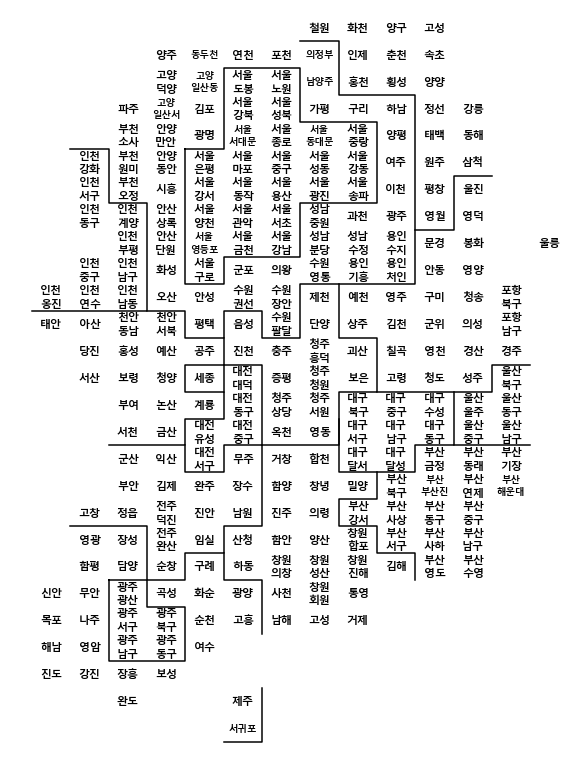

In [55]:
plt.figure(figsize=(8, 11))
for idx, row in draw_korea.iterrows():
    if len(row['ID'].split())==2:
        dispname = '{}\n{}'.format(row['ID'].split()[0], row['ID'].split()[1])
    elif row['ID'][:2] =='고성':
        dispname = '고성'
    else:
        dispname = row['ID']
        
    if len(dispname.splitlines()[-1]) >= 3:
        fontsize, linespacing = 9.5, 1.5
    else:
        fontsize, linespacing = 11, 1.2
    
    plt.annotate(dispname, (row['x']+0.5, row['y']+0.5), weight='bold', fontsize= fontsize, ha='center', va='center', linespacing=linespacing)

for path in BORDER_LINES:
    ys, xs = zip(*path)
    plt.plot(xs, ys, c='black', lw=1.5)

plt.gca().invert_yaxis()
plt.axis('off')
plt.tight_layout()
plt.show()

### draw_korea와 pop을 합쳐보기

In [56]:
tmp_list = list(set(pop['ID'].unique()) - set(draw_korea['ID'].unique()))
for tmp in tmp_list:
    pop = pop.drop(pop[pop['ID']==tmp].index)
tmp_list

['창원', '전주', '포항', '천안', '수원', '성남', '용인', '고양', '부천', '안양', '안산', '청주']

In [57]:
pop = pd.merge(pop, draw_korea, how='left', on=['ID'])
pop.head()

,광역시도,시도,20-39세여자,20-39세합계,65세이상합계,인구수남자,인구수여자,인구수합계,소멸비율,소멸위기지역,ID,y,x
0,강원도,강릉시,23098.0,49384.0,37679.0,106231.0,107615.0,213846.0,1.226041,False,강릉,3,11
1,강원도,고성군,2529.0,7023.0,7151.0,15899.0,14215.0,30114.0,0.707314,True,고성(강원),0,10
2,강원도,동해시,9753.0,21264.0,15124.0,47166.0,46131.0,93297.0,1.289738,False,동해,4,11
3,강원도,삼척시,7115.0,15823.0,14610.0,35253.0,34346.0,69599.0,0.973990,True,삼척,5,11
4,강원도,속초시,8752.0,18708.0,12752.0,40288.0,41505.0,81793.0,1.372647,False,속초,1,10


In [58]:
def drawKorea(targetData, blockedMap, cmapname):
    gamma = .75
    whitelabelmin = (max(blockedMap[targetData]) - min(blockedMap[targetData]))*0.25 + min(blockedMap[targetData])
    datalabel = targetData
    
    vmin = min(blockedMap[targetData])
    vmax = max(blockedMap[targetData])
    
    mapdata = blockedMap.pivot_table(index='y', columns = 'x', values = targetData)
    masked_mapdata = np.ma.masked_where(np.isnan(mapdata), mapdata)
    
    plt.figure(figsize = (6, 8))
    plt.pcolor(masked_mapdata, vmin=vmin, vmax=vmax, cmap=cmapname, edgecolor='#aaaaaa', linewidth=0.5)
    
    for idx, row in blockedMap.iterrows():
        if len(row['ID'].split())==2:
            dispname = '{}\n{}'.format(row['ID'].split()[0], row['ID'].split()[1])
        elif row['ID'][:2] =='고성':
            dispname = '고성'
        else:
            dispname = row['ID']

        if len(dispname.splitlines()[-1]) >= 3:
            fontsize, linespacing = 8, 1.1
        else:
            fontsize, linespacing = 9, 0.9
            
        annocolor = 'white' if row[targetData] > whitelabelmin else 'black'
        plt.annotate(dispname, (row['x']+0.5, row['y']+0.5), weight='bold', fontsize= fontsize, ha='center', va='center', linespacing=linespacing)
        
    for path in BORDER_LINES:
        ys, xs = zip(*path)
        plt.plot(xs, ys, c='black', lw=2)
    
    plt.gca().invert_yaxis()
    plt.axis('off')
    cb =plt.colorbar(shrink=.1, aspect=10)
    cb.set_label(datalabel)
    
    plt.tight_layout()
    plt.show()

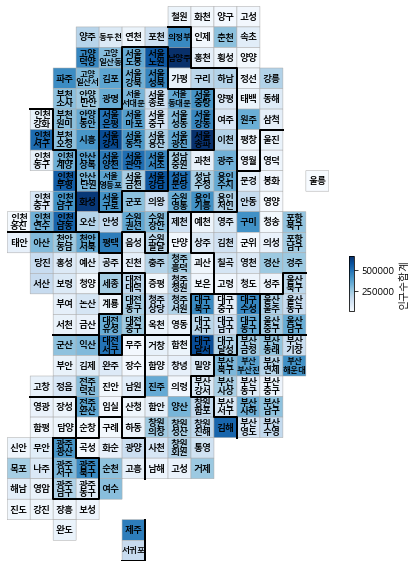

In [59]:
drawKorea('인구수합계', pop, 'Blues')

### 소멸위기지역

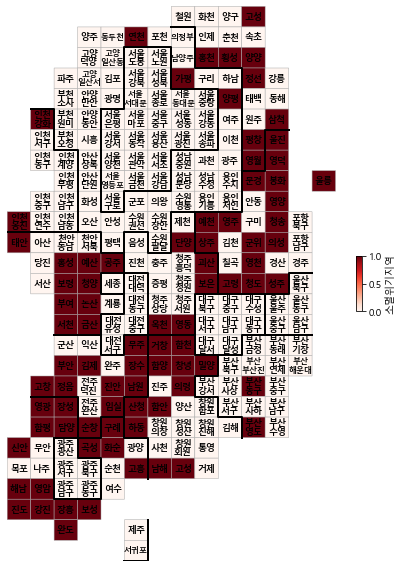

In [60]:
pop['소멸위기지역'] = [1 if con else 0 for con in pop['소멸위기지역']]
drawKorea('소멸위기지역', pop, 'Reds')

In [61]:
def drawKorea2(targetData, blockedMap, cmapname):
    gamma = .75
    whitelabelmin = 20.
    datalabel = targetData
    
    #음수가 존재할 수 있기 때문에 절대값으로 변경
    tmp_max = max([np.abs(min(blockedMap[targetData])), np.abs(max(blockedMap[targetData]))])
    vmin, vmax = -tmp_max, tmp_max
        
    mapdata = blockedMap.pivot_table(index='y', columns = 'x', values = targetData)
    masked_mapdata = np.ma.masked_where(np.isnan(mapdata), mapdata)
    
    plt.figure(figsize = (6, 8))
    plt.pcolor(masked_mapdata, vmin=vmin, vmax=vmax, cmap=cmapname, edgecolor='#aaaaaa', linewidth=0.5)
    
    for idx, row in blockedMap.iterrows():
        if len(row['ID'].split())==2:
            dispname = '{}\n{}'.format(row['ID'].split()[0], row['ID'].split()[1])
        elif row['ID'][:2] =='고성':
            dispname = '고성'
        else:
            dispname = row['ID']

        if len(dispname.splitlines()[-1]) >= 3:
            fontsize, linespacing = 8, 1.1
        else:
            fontsize, linespacing = 9, 0.9
            
        annocolor = 'white' if row[targetData] > whitelabelmin else 'black'
        plt.annotate(dispname, (row['x']+0.5, row['y']+0.5), weight='bold', fontsize= fontsize, ha='center', va='center', color=annocolor, linespacing=linespacing)
        
    for path in BORDER_LINES:
        ys, xs = zip(*path)
        plt.plot(xs, ys, c='black', lw=2)
    
    plt.gca().invert_yaxis()
    plt.axis('off')
    cb =plt.colorbar(shrink=.1, aspect=10)
    cb.set_label(datalabel)
    
    plt.tight_layout()
    plt.show()

In [62]:
pop['여성비']= (pop['인구수여자']/pop['인구수합계'] -0.5) * 100

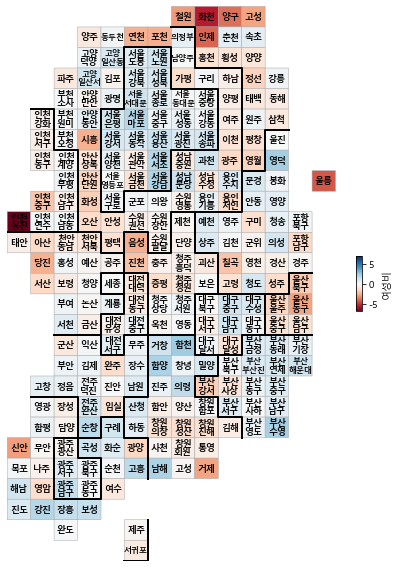

In [63]:
drawKorea2('여성비', pop, 'RdBu')

### 2030 여성비

In [64]:
pop['2030여성비'] = (pop['20-39세여자']/pop['20-39세합계']-0.5)*100

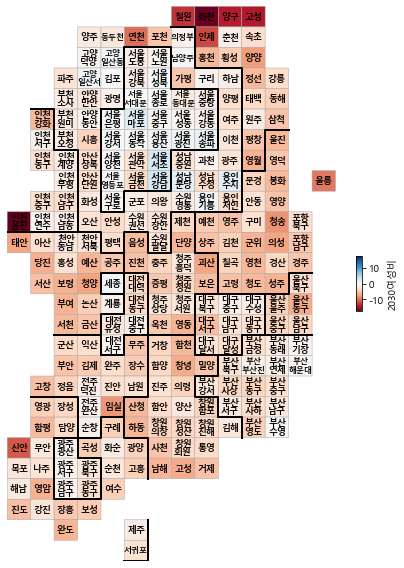

In [65]:
drawKorea2('2030여성비', pop, 'RdBu')